In [94]:
%pip install openpyxl


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [224]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [96]:
# Read the Excel file
raw = pd.read_excel("rawdata.xlsx")
raw = raw[~raw['Country Name'].isin(['Burundi', 
                                            'Cambodia', 
                                            'Central African Republic',
                                            'Honduras',
                                            'Hong Kong SAR, China',
                                            'Kyrgyz Republic',
                                            'Liberia',
                                            'Nicaragua',
                                            'Papua New Guinea',
                                            'Saudi Arabia',
                                            'Somalia',
                                            'Tajikistan',
                                            'United Arab Emirates'])]
raw.head()

,Country Name,Country Code,Series Name,Series Code,1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,..,..,..,..,..,..,...,26.1,27.6,28.8,30.3,31.4,32.6,33.8,34.9,36.1,..
1,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,..,..,..,..,..,..,...,10.2,11.4,12.6,13.5,14.5,15.6,16.4,17.4,18.5,..
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,..,..,..,..,..,..,...,78,79.5,80.5,81.6,82.6,83.2,83.8,84.5,85,..
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,...,89.5,71.5,97.7,97.7,93.4,97.7,97.7,97.7,85.3,..
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,..,..,..,..,..,..,...,86.5,64.6,97.1,97.1,91.6,97.1,97.1,97.1,81.7,..


In [97]:
raw.to_excel("smally.xlsx")

In [98]:
# Delete rows where 'Series Name' contains '%'
raw = raw[~raw['Series Name'].str.contains('%')]

# Display the updated dataframe
raw.head()

,Country Name,Country Code,Series Name,Series Code,1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
23,Afghanistan,AFG,Adjusted net national income (constant 2015 US$),NY.ADJ.NNTY.KD,..,..,..,..,..,..,...,..,18572571195.578602,..,..,..,..,..,..,..,..
24,Afghanistan,AFG,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,..,..,..,..,..,..,...,18885765415.865398,18572571195.578602,16826000216.6437,17751891426.850899,17143221811.4464,17731939790.9716,18585819842.831001,13621070038.579,..,..
26,Afghanistan,AFG,Adjusted net national income per capita (const...,NY.ADJ.NNTY.PC.KD,..,..,..,..,..,..,...,..,548.968454,..,..,..,..,..,..,..,..
27,Afghanistan,AFG,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,..,..,..,..,..,..,...,575.916815,548.968454,484.89059,497.406029,466.570602,468.403506,475.718084,340.523244,..,..
29,Afghanistan,AFG,"Adjusted net savings, excluding particulate em...",NY.ADJ.SVNX.CD,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [99]:
# Extract country names from the column names
country_names = raw['Country Name'].unique()

# Create a mapping from country names to unique IDs
country_id_map = {country: idx + 1 for idx, country in enumerate(country_names)}

# Create the country_id column by mapping the country names
raw['country_id'] = raw['Country Name'].map(country_id_map)

# Move the country_id column to the first position
# Change the country_id into a string and add a leading zero if it is a single digit
raw['country_id'] = raw['country_id'].apply(lambda x: f'{x:02}')

# Move the country_id column to the first position
cols = ['country_id'] + [col for col in raw.columns if col != 'country_id']
raw = raw[cols]

country = pd.DataFrame()

country['id'] = raw['country_id'].unique()
country['location'] = raw['Country Name'].unique()
# Display the updated dataframe
country.to_csv('country.csv', index=False)
country.head()

,id,location
0,01,Afghanistan
1,02,Australia
2,03,Austria
3,04,Bangladesh
4,05,Belgium


In [100]:
# Extract series names from the column names
series_names = raw['Series Name'].unique()

# Create a mapping from series names to unique IDs
series_id_map = {series: idx + 1 for idx, series in enumerate(series_names)}

# Create the series_id column by mapping the series names
raw['series_id'] = raw['Series Name'].map(series_id_map)

# Change the series_id into a string and add leading zeros
raw['series_id'] = raw['series_id'].apply(lambda x: f'{x:03}')

# Move the series_id column to the first position
cols = ['series_id'] + [col for col in raw.columns if col != 'series_id']
raw = raw[cols]

series = pd.DataFrame({
	'id': raw['series_id'].unique(),
	'Series': series_names
})

# Display the updated dataframe
series.to_csv('series.csv', index=False)
series.head()

,id,Series
0,001,Adjusted net national income (constant 2015 US$)
1,002,Adjusted net national income (current US$)
2,003,Adjusted net national income per capita (const...
3,004,Adjusted net national income per capita (curre...
4,005,"Adjusted net savings, excluding particulate em..."


In [101]:
category = pd.read_excel("category.xlsx")
# Merge the resulting DataFrame with category to get Category
raw_temp = raw.merge(category, left_on='Series Name', right_on='Series Name', how='left')

# Rename 'Category' to 'category_id'
raw_temp.rename(columns={'Category': 'category_id'}, inplace=True)

# Change the category_id into a string and add leading zeros if necessary
raw_temp['category_id'] = raw_temp['category_id'].apply(lambda x: f'{int(x):02}' if pd.notnull(x) else '00')

# Move 'category_id' to the third position
cols = raw_temp.columns.tolist()
cols.insert(2, cols.pop(cols.index('category_id')))
raw_temp = raw_temp[cols]

# Display the updated DataFrame
raw_temp.head()

,series_id,country_id,category_id,Country Name,Country Code,Series Name,Series Code,1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,001,01,05,Afghanistan,AFG,Adjusted net national income (constant 2015 US$),NY.ADJ.NNTY.KD,..,..,..,...,..,18572571195.578602,..,..,..,..,..,..,..,..
1,002,01,05,Afghanistan,AFG,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,..,..,..,...,18885765415.865398,18572571195.578602,16826000216.6437,17751891426.850899,17143221811.4464,17731939790.9716,18585819842.831001,13621070038.579,..,..
2,003,01,05,Afghanistan,AFG,Adjusted net national income per capita (const...,NY.ADJ.NNTY.PC.KD,..,..,..,...,..,548.968454,..,..,..,..,..,..,..,..
3,004,01,05,Afghanistan,AFG,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,..,..,..,...,575.916815,548.968454,484.89059,497.406029,466.570602,468.403506,475.718084,340.523244,..,..
4,005,01,05,Afghanistan,AFG,"Adjusted net savings, excluding particulate em...",NY.ADJ.SVNX.CD,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [102]:
# Add a new column 'data_id' starting from 1 for the first row
raw_temp['data_id'] = range(1, len(raw) + 1)

# Move the 'data_id' column to the first position
cols = ['data_id'] + [col for col in raw_temp.columns if col != 'data_id']
raw_temp = raw_temp[cols]

cols = raw_temp.columns.tolist()
cols.insert(3, cols.pop(cols.index('data_id')))
raw_temp = raw_temp[cols]

raw_temp['data_id'] = raw_temp['data_id'].apply(lambda x: f'{int(x):06}' if pd.notnull(x) else x)

# Display the updated dataframe
raw_temp.head()

,series_id,country_id,category_id,data_id,Country Name,Country Code,Series Name,Series Code,1993 [YR1993],1994 [YR1994],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,001,01,05,000001,Afghanistan,AFG,Adjusted net national income (constant 2015 US$),NY.ADJ.NNTY.KD,..,..,...,..,18572571195.578602,..,..,..,..,..,..,..,..
1,002,01,05,000002,Afghanistan,AFG,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,..,..,...,18885765415.865398,18572571195.578602,16826000216.6437,17751891426.850899,17143221811.4464,17731939790.9716,18585819842.831001,13621070038.579,..,..
2,003,01,05,000003,Afghanistan,AFG,Adjusted net national income per capita (const...,NY.ADJ.NNTY.PC.KD,..,..,...,..,548.968454,..,..,..,..,..,..,..,..
3,004,01,05,000004,Afghanistan,AFG,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,..,..,...,575.916815,548.968454,484.89059,497.406029,466.570602,468.403506,475.718084,340.523244,..,..
4,005,01,05,000005,Afghanistan,AFG,"Adjusted net savings, excluding particulate em...",NY.ADJ.SVNX.CD,..,..,...,..,..,..,..,..,..,..,..,..,..


In [103]:
# Create the 'id' column by combining 'series_id', 'country_id', and 'data_id'
raw_temp['id'] = raw_temp['series_id'] + raw_temp['country_id'] + raw_temp['category_id'] + raw_temp['data_id']

# Move the 'id' column to the first position
cols = ['id'] + [col for col in raw_temp.columns if col != 'id']
raw_temp = raw_temp[cols]

# Display the updated dataframe
raw_temp.head()

,id,series_id,country_id,category_id,data_id,Country Name,Country Code,Series Name,Series Code,1993 [YR1993],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,0010105000001,001,01,05,000001,Afghanistan,AFG,Adjusted net national income (constant 2015 US$),NY.ADJ.NNTY.KD,..,...,..,18572571195.578602,..,..,..,..,..,..,..,..
1,0020105000002,002,01,05,000002,Afghanistan,AFG,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,..,...,18885765415.865398,18572571195.578602,16826000216.6437,17751891426.850899,17143221811.4464,17731939790.9716,18585819842.831001,13621070038.579,..,..
2,0030105000003,003,01,05,000003,Afghanistan,AFG,Adjusted net national income per capita (const...,NY.ADJ.NNTY.PC.KD,..,...,..,548.968454,..,..,..,..,..,..,..,..
3,0040105000004,004,01,05,000004,Afghanistan,AFG,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,..,...,575.916815,548.968454,484.89059,497.406029,466.570602,468.403506,475.718084,340.523244,..,..
4,0050105000005,005,01,05,000005,Afghanistan,AFG,"Adjusted net savings, excluding particulate em...",NY.ADJ.SVNX.CD,..,...,..,..,..,..,..,..,..,..,..,..


In [104]:
# Transpose and set the column names
raw_transpose = raw_temp.transpose()
raw_transpose.columns = raw_transpose.iloc[0]
raw_transpose = raw_transpose.drop(raw_transpose.index[0:9])

raw_transpose.index = raw_transpose.index.str[0:4].astype(int)
raw_transpose.head(10)


id,0010105000001,0020105000002,0030105000003,0040105000004,0050105000005,0060105000006,0070104000007,0080105000008,0090105000009,0100104000010,...,6914004027757,6924005027758,6934003027759,6944001027760,3744101027761,3254101027762,6564100027763,5174104027764,0274104027765,6954100027766
1993,..,..,..,..,..,..,18789511.490618,..,..,2889968.268093,...,..,..,41.25,3200,62,65.755043,..,38.936922,..,78.2
1994,..,..,..,..,..,..,18890354.694955,..,..,2514650.809061,...,..,..,41.25,3300,61.3,65.99948,..,38.825854,..,77.8
1995,..,..,..,..,..,..,18956055.119221,..,..,2155010.805053,...,..,..,41.25,3600,60.1,66.186881,..,38.782136,..,76.4
1996,..,..,..,..,..,..,18782416.78028,..,..,2452002.241868,...,..,..,41.25,3700,59,66.448445,..,38.866449,..,76
1997,..,..,..,..,..,..,18211710.518801,..,..,1920184.156234,...,..,..,43.75,3800,57.7,66.789238,..,39.087701,..,76
1998,..,..,..,..,..,..,17803915.867534,..,..,1070374.653372,...,..,..,43.75,3700,56.3,67.062505,..,39.374088,..,73.9
1999,..,..,..,..,..,..,14378316.081011,..,..,1455843.457458,...,..,..,43.75,3800,54.8,67.355271,..,39.650354,..,73.9
2000,..,..,..,..,..,..,14106824.556075,..,..,2065691.235409,...,..,..,43.75,3500,53,67.667522,..,39.836516,..,72.25
2001,..,..,..,..,..,..,14166993.868521,..,..,2013539.289016,...,..,..,43.75,3300,51.6,68.018239,..,39.909578,..,71.95
2002,..,..,..,..,..,..,20757344.213491,346155362.11051,..,1419474.682886,...,..,..,43.75,3300,49.9,68.298919,..,39.904861,..,70.3


In [105]:
# Cleaning empty data
raw_transpose_na = raw_transpose.replace("..", np.nan)
raw_db = raw_transpose_na.transpose()
raw_db.to_csv('rawdatafull.csv')

raw_db.head()

/var/folders/qz/xwx1r5sx2k9dgf6nxmgph3200000gn/T/ipykernel_44453/3999669800.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_transpose_na = raw_transpose.replace("..", np.nan)


,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
id,,,,,,,,,,,,,,,,,,,,,
0010105000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.857257e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0020105000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.888577e+10,1.857257e+10,1.682600e+10,1.775189e+10,1.714322e+10,1.773194e+10,1.858582e+10,1.362107e+10,NaN,NaN
0030105000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.489685e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0040105000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.759168e+02,5.489685e+02,4.848906e+02,4.974060e+02,4.665706e+02,4.684035e+02,4.757181e+02,3.405232e+02,NaN,NaN
0050105000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
def read_data(path):
    df = pd.read_csv(path)
    df['id'] = df['id'].astype(str)
    df['id'] = df['id'].apply(lambda x: f'{int(x):013}' if pd.notnull(x) else x)

    return df

In [107]:
raw_db_extract = read_data('rawdatafull.csv')
raw_db_transpose = raw_db_extract.transpose()
raw_db_transpose.columns = raw_db_transpose.iloc[0]
raw_db_transpose = raw_db_transpose.drop(raw_db_transpose.index[0])

raw_db_transpose.head()

id,0010105000001,0020105000002,0030105000003,0040105000004,0050105000005,0060105000006,0070104000007,0080105000008,0090105000009,0100104000010,...,6914004027757,6924005027758,6934003027759,6944001027760,3744101027761,3254101027762,6564100027763,5174104027764,0274104027765,6954100027766
1993,NaN,NaN,NaN,NaN,NaN,NaN,18789511.490618,NaN,NaN,2889968.268093,...,NaN,NaN,41.25,3200.0,62.0,65.755043,NaN,38.936922,NaN,78.2
1994,NaN,NaN,NaN,NaN,NaN,NaN,18890354.694955,NaN,NaN,2514650.809061,...,NaN,NaN,41.25,3300.0,61.3,65.99948,NaN,38.825854,NaN,77.8
1995,NaN,NaN,NaN,NaN,NaN,NaN,18956055.119221,NaN,NaN,2155010.805053,...,NaN,NaN,41.25,3600.0,60.1,66.186881,NaN,38.782136,NaN,76.4
1996,NaN,NaN,NaN,NaN,NaN,NaN,18782416.78028,NaN,NaN,2452002.241868,...,NaN,NaN,41.25,3700.0,59.0,66.448445,NaN,38.866449,NaN,76.0
1997,NaN,NaN,NaN,NaN,NaN,NaN,18211710.518801,NaN,NaN,1920184.156234,...,NaN,NaN,43.75,3800.0,57.7,66.789238,NaN,39.087701,NaN,76.0


In [108]:

# Drop columns where the number of NaN values is larger than 10% of the number of rows
na_threshold = len(raw_db_transpose) * 0.9
raw_transpose_na_drop = raw_transpose_na.dropna(axis=1, thresh=na_threshold)

# Check the number of NaN values in each column and the length of the dataframe
raw_transpose_na_drop.isna().sum(), len(raw_transpose_na)


(id
 0070104000007    2
 0100104000010    2
 0110104000011    2
 0120104000012    2
 0150101000015    1
                 ..
 6944001027760    1
 3744101027761    1
 3254101027762    1
 5174104027764    3
 6954100027766    3
 Length: 12221, dtype: int64,
 31)

In [109]:
std = raw_transpose_na_drop.std()

std_biggerthan0 = std[std > 0]
raw_no0sd = raw_transpose_na_drop[std_biggerthan0.index]

raw_no0sd.index

Index([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64')

In [148]:
# Function to fill NaN values using linear regression
def fill_na_with_linear_regression(temp_df):
    df = temp_df.copy()
    
    for column in df.columns:
        # Get the index of non-NaN values
        non_na_index = df[column].dropna().index
        # Get the index of NaN values
        na_index = df[column][df[column].isna()].index
        
        # Set the first value in the index to zero if it is NaN
        non_na_index = df[column].dropna().index
        na_index = df[column][df[column].isna()].index
        
        if len(non_na_index) > 1 and len(na_index) > 0:  # Need at least two points to fit a linear model and at least one NaN value to predict
            # Fit the linear regression model
            X = non_na_index.values.reshape(-1, 1)
            y = df.loc[non_na_index, column].values
            model = LinearRegression().fit(X, y)
            
            # Predict the NaN values
            X_na = na_index.values.reshape(-1, 1)
            y_na_pred = model.predict(X_na)
            
            # Fill the NaN values with the predicted values
            df.loc[na_index, column] = y_na_pred
    
    return df


In [111]:

# Apply the function to the dataframe
raw_clean = fill_na_with_linear_regression(raw_no0sd)

In [112]:
# Check the number of NaN values in each column and the length of the dataframe
raw_clean.isna().sum(), len(raw_transpose_na)
raw_clean_transpose = raw_clean.transpose()

raw_clean_transpose.to_csv("cleaned_data.csv")
raw_clean_transpose.head()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
id,,,,,,,,,,,,,,,,,,,,,
0070104000007,1.878951e+07,1.889035e+07,1.895606e+07,1.878242e+07,1.821171e+07,1.780392e+07,1.437832e+07,1.410682e+07,1.416699e+07,2.075734e+07,...,1.643133e+08,2.068983e+08,1.903312e+08,1.788537e+08,2.378150e+08,2.479358e+08,2.323007e+08,1.822300e+08,2.554747e+08,2.653037e+08
0100104000010,2.889968e+06,2.514651e+06,2.155011e+06,2.452002e+06,1.920184e+06,1.070375e+06,1.455843e+06,2.065691e+06,2.013539e+06,1.419475e+06,...,1.986275e+07,1.129754e+07,1.389760e+07,2.317650e+07,3.041629e+07,1.935435e+07,1.161018e+06,2.714217e+06,1.977032e+07,2.049402e+07
0110104000011,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.721533e+05,3.051536e+05,3.888372e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.353432e+05,1.409780e+05
0120104000012,2.147732e+07,2.290039e+07,2.382507e+07,2.183181e+07,2.402106e+07,2.278064e+07,2.805942e+07,2.431737e+07,2.400059e+07,3.715494e+07,...,4.450926e+07,4.696891e+07,5.182773e+07,4.399937e+07,4.422070e+07,5.172933e+07,4.838257e+07,4.737678e+07,5.125405e+07,5.240863e+07
0150101000015,1.494610e+02,1.568350e+02,1.583150e+02,1.576030e+02,1.587610e+02,1.559420e+02,1.563650e+02,1.543100e+02,1.524710e+02,1.501610e+02,...,8.406900e+01,8.104300e+01,7.813000e+01,7.530000e+01,7.302100e+01,7.096700e+01,6.887700e+01,6.659900e+01,6.533900e+01,-1.935380e+03


In [113]:
def extract_series(df):
    df_temp = df
    # Convert 'id' column to string type
    df_temp['id'] = df_temp['id'].astype(str)
    # Add a new column 'series' which is the first three digits of 'id'
    df_temp['series'] = df_temp['id'].str[:3].astype(int)

    # Read the series.csv file
    series = pd.read_csv('series.csv')

    # Rename the 'id' column in the series dataframe to 'series_id'
    series.rename(columns={'id': 'series_id'}, inplace=True)

    # Merge data with series on the 'series' column from data and 'series_id' column from series
    df_temp_1 = df_temp.merge(series, left_on='series', right_on='series_id', how='left')
    cols = df_temp_1.columns.tolist()
    cols.insert(1, cols.pop(cols.index('Series')))
    df_temp_1 = df_temp_1[cols]
    df_temp_1.drop(columns=['series_id', 'series'], inplace=True)

    return df_temp_1

In [114]:
def extract_contry(df):
    df_temp = df
    # Add a new column 'country' which is the fourth and fifth digits of 'id'
    df_temp['country'] = df_temp['id'].str[3:5].astype(int)

# Read the country.csv file
    country = pd.read_csv('country.csv')

# Rename the 'id' column in the country dataframe to 'country_id'
    country.rename(columns={'id': 'country_id'}, inplace=True)

# Merge data_series with country on the 'country' column from data_series and 'country_id' column from country
    df_temp_1 = df_temp.merge(country, left_on='country', right_on='country_id', how='left')

# Insert 'location' column into the correct position
    cols = df_temp_1.columns.tolist()
    cols.insert(2, cols.pop(cols.index('location')))
    df_temp_1 = df_temp_1[cols]

# Drop unnecessary columns
    df_temp_1.drop(columns=['country_id', 'country'], inplace=True)
    
    return df_temp_1

In [115]:
def extract_category(df):
    df_temp = df
    # Add a new column 'country' which is the fourth and fifth digits of 'id'
    df_temp['category'] = df_temp['id'].str[5:7].astype(int)

# Read the country.csv file
    category = pd.read_excel('category_id.xlsx')

# Rename the 'id' column in the country dataframe to 'country_id'
    category.rename(columns={'id': 'category_id'}, inplace=True)

# Merge data_series with country on the 'country' column from data_series and 'country_id' column from country
    df_temp_1 = df_temp.merge(category, left_on='category', right_on='category_id', how='left')

# Insert 'location' column into the correct position
    cols = df_temp_1.columns.tolist()
    cols.insert(3, cols.pop(cols.index('Category')))
    df_temp_1 = df_temp_1[cols]

# Drop unnecessary columns
    df_temp_1.drop(columns=['category_id', 'category'], inplace=True)

    return df_temp_1

data = read_data('cleaned_data.csv')
data_series = extract_series(data)
data_country = extract_contry(data_series)
data_category = extract_category(data_country)

data_category.head()

,id,Series,location,Category,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,0070104000007,Adjusted savings: carbon dioxide damage (curre...,Afghanistan,Environmental,1.878951e+07,1.889035e+07,1.895606e+07,1.878242e+07,1.821171e+07,1.780392e+07,...,1.643133e+08,2.068983e+08,1.903312e+08,1.788537e+08,2.378150e+08,2.479358e+08,2.323007e+08,1.822300e+08,2.554747e+08,2.653037e+08
1,0100104000010,Adjusted savings: energy depletion (current US$),Afghanistan,Environmental,2.889968e+06,2.514651e+06,2.155011e+06,2.452002e+06,1.920184e+06,1.070375e+06,...,1.986275e+07,1.129754e+07,1.389760e+07,2.317650e+07,3.041629e+07,1.935435e+07,1.161018e+06,2.714217e+06,1.977032e+07,2.049402e+07
2,0110104000011,Adjusted savings: mineral depletion (current US$),Afghanistan,Environmental,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.721533e+05,3.051536e+05,3.888372e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.353432e+05,1.409780e+05
3,0120104000012,Adjusted savings: net forest depletion (curren...,Afghanistan,Environmental,2.147732e+07,2.290039e+07,2.382507e+07,2.183181e+07,2.402106e+07,2.278064e+07,...,4.450926e+07,4.696891e+07,5.182773e+07,4.399937e+07,4.422070e+07,5.172933e+07,4.838257e+07,4.737678e+07,5.125405e+07,5.240863e+07
4,0150101000015,"Adolescent fertility rate (births per 1,000 wo...",Afghanistan,Social,1.494610e+02,1.568350e+02,1.583150e+02,1.576030e+02,1.587610e+02,1.559420e+02,...,8.406900e+01,8.104300e+01,7.813000e+01,7.530000e+01,7.302100e+01,7.096700e+01,6.887700e+01,6.659900e+01,6.533900e+01,-1.935380e+03


In [116]:
def extract_specific(code):
    df = read_data('rawdatafull.csv')
    df_temp = df[df['id'].str[:3] == code]
    df_transpose = df_temp.transpose()
    df_transpose.columns = df_transpose.iloc[0]
    df_drop = df_transpose.drop(df_transpose.index[0])
    df_clean = fill_na_with_linear_regression(df_drop)
    df_transpose_2 = df_clean.transpose()
    df_transpose_2.reset_index(inplace=True)
    df_series = extract_series(df_transpose_2)
    df_country = extract_contry(df_series)
    df_category = extract_category(df_country)

    return df_category

In [117]:
def extract_specific_bigger_zero(code):
    df = extract_specific(code)
    years = [str(year) for year in range(1993, 2024)]
    df[df[years] < 0] = 0

    return df

In [118]:
gdp = extract_specific_bigger_zero(code = '185')
gdp.to_excel('gdp.xlsx', index=False)
gdp.head()

,id,Series,location,Category,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1850105000185,GDP (current LCU),Afghanistan,Economical,0,0,0,0,0,0,...,1176469485800.0,1222756495400.0,1222916881100.0,1285460326500.0,1327690394700.0,1469596303300.0,1534966000000.0,1251172000000.0,1283441000000.0,1357275145600.0
1,1850205000879,GDP (current LCU),Australia,Economical,444229000000.0,466617000000.0,495846000000.0,528969000000.0,556665000000.0,589240000000.0,...,1599333000000.0,1624165000000.0,1657914000000.0,1757655000000.0,1842045000000.0,1947319000000.0,1981663000000.0,2085822000000.0,2330329000000.0,2567513000000.0
2,1850305001573,GDP (current LCU),Austria,Economical,160297645000.0,168292833000.0,175916998000.0,181541916000.0,187778736000.0,195274450000.0,...,330113483000.0,342083540000.0,355665600000.0,367294903000.0,383234317000.0,395706770000.0,380317879000.0,406232064000.0,448007445000.0,473226718000.0
3,1850405002267,GDP (current LCU),Bangladesh,Economical,1253694434000.0,1354123301400.0,1525177900500.0,1899334000000.0,2060032000000.0,2269299000000.0,...,13436744000000.0,15158023000000.0,20758211000000.0,23243072000000.0,26392481000000.0,29514285000000.0,31704694000000.0,35301848000000.0,39717164000000.0,44908417000000.0
4,1850505002961,GDP (current LCU),Belgium,Economical,192721412000.0,203106897000.0,210489100000.0,214287100000.0,224101500000.0,232623800000.0,...,404958300000.0,415538000000.0,428467100000.0,443407200000.0,459491800000.0,479444900000.0,463750900000.0,506023200000.0,563543600000.0,596320600000.0


In [ ]:
#clean = data_category[~data_category['Series'].str.contains('GDP')]
#clean_2 = data_category[~data_category['Series'].str.contains('current US')]
#clean_3 = clean_2[~clean_2['Series'].str.contains('constant 2015 US')]
#clean_4 = clean_3[~clean_3['Series'].str.contains('constant LCU')]


In [191]:

clean_8 = data_category[data_category['location'] != 'World']
clean_8.to_excel('data.xlsx', index=False)

In [193]:
def getting_category(category):
    df = pd.read_excel('data.xlsx')
    df_temp = df[df['Category'] == category]
    df_transpose = df_temp.transpose()
    df_drop_id = df_transpose.drop(df_transpose.index[0])
    df_drop_id.columns = df_drop_id.loc['location'] + '_' + df_drop_id.loc['Series']
    df_drop_id = df_drop_id.drop(df_drop_id.index[0:3])
    
    return df_drop_id

In [188]:
getting_category('Social').to_excel('social.xlsx', index=False)
getting_category('Political').to_excel('political.xlsx', index=False)
getting_category('Economical').to_excel('economic.xlsx', index=False)
getting_category('Environmental').to_excel('environmental.xlsx', index=False)
getting_category('Cultural').to_excel('cultural.xlsx', index=False)

In [194]:
y_data = pd.read_excel('qol.xlsx')

y_data.index = y_data['Indicator Name']
y_data.drop(columns=['Indicator Name', 'Country Name', 'Country Code', 'Indicator Code'], inplace=True)

y_transpose = y_data.transpose()
y_transpose = y_transpose.replace("..", np.nan)
y_clean = fill_na_with_linear_regression(y_transpose)
y = y_clean.transpose()

y.index

/var/folders/qz/xwx1r5sx2k9dgf6nxmgph3200000gn/T/ipykernel_44453/891530702.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_transpose = y_transpose.replace("..", np.nan)


Index(['Primary completion rate, total (% of relevant age group)',
       'Mortality rate, infant (per 1,000 live births)',
       'Life expectancy at birth, total (years)', 'Literacy rate (%)',
       'Time required to get electricity (days)',
       'Individuals using the Internet (% of population)',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'Poverty headcount ratio at societal poverty line (% of population)',
       'World medium voter turnout in election'],
      dtype='object', name='Indicator Name')

In [195]:
life_expectancy = 0.9 * (y.loc['Life expectancy at birth, total (years)'] - y.loc['Life expectancy at birth, total (years)'].min()) / (y.loc['Life expectancy at birth, total (years)'].max() - y.loc['Life expectancy at birth, total (years)'].min())
morality = 0.1 * (1 -  (y.loc['Mortality rate, infant (per 1,000 live births)'] - y.loc['Mortality rate, infant (per 1,000 live births)'].min()) / (y.loc['Mortality rate, infant (per 1,000 live births)'].max() - y.loc['Mortality rate, infant (per 1,000 live births)'].min()))

health = life_expectancy + morality
health

1993    0.000000
1994    0.029926
1995    0.054557
1996    0.087473
1997    0.130020
1998    0.165046
1999    0.202573
2000    0.243106
2001    0.287050
2002    0.323694
2003    0.359694
2004    0.392905
2005    0.436103
2006    0.483208
2007    0.517414
2008    0.540748
2009    0.589592
2010    0.623544
2011    0.665340
2012    0.700696
2013    0.736665
2014    0.774395
2015    0.800810
2016    0.832234
2017    0.857010
2018    0.885118
2019    0.909203
2020    0.825504
2021    0.721213
2022    0.799919
2023    1.000000
dtype: float64

In [177]:
primary = 0.8 * (y.loc['Primary completion rate, total (% of relevant age group)'] - y.loc['Primary completion rate, total (% of relevant age group)'].min()) / (y.loc['Primary completion rate, total (% of relevant age group)'].max() - y.loc['Primary completion rate, total (% of relevant age group)'].min())
literacy = 0.2 * (  (y.loc['Literacy rate (%)'] - y.loc['Literacy rate (%)'].min()) / (y.loc['Literacy rate (%)'].max() - y.loc['Literacy rate (%)'].min()))

education = primary + literacy
education

1993    0.033894
1994    0.007091
1995    0.123378
1996    0.079860
1997    0.120145
1998    0.158635
1999    0.186260
2000    0.229887
2001    0.359854
2002    0.389167
2003    0.407711
2004    0.450154
2005    0.507473
2006    0.529302
2007    0.618946
2008    0.739765
2009    0.800564
2010    0.797579
2011    0.760364
2012    0.758434
2013    0.754986
2014    0.749511
2015    0.735877
2016    0.778805
2017    0.771237
2018    0.782773
2019    0.781663
2020    0.793652
2021    0.841702
2022    0.996428
2023    0.750211
dtype: float64

In [ ]:
electricity = 0.5 * (1 - (y.loc['Time required to get electricity (days)'] - y.loc['Time required to get electricity (days)'].min()) / (y.loc['Time required to get electricity (days)'].max() - y.loc['Time required to get electricity (days)'].min()))
internet = 0.5 * (  (y.loc['Individuals using the Internet (% of population)'] - y.loc['Individuals using the Internet (% of population)'].min()) / (y.loc['Individuals using the Internet (% of population)'].max() - y.loc['Individuals using the Internet (% of population)'].min()))

infrastruce = electricity + internet
infrastruce

1993    0.000000
1994    0.018017
1995    0.037083
1996    0.058536
1997    0.080529
1998    0.105362
1999    0.133129
2000    0.165322
2001    0.191676
2002    0.226606
2003    0.255792
2004    0.286414
2005    0.314704
2006    0.344015
2007    0.382996
2008    0.418258
2009    0.450809
2010    0.506749
2011    0.535763
2012    0.561886
2013    0.573464
2014    0.617648
2015    0.674213
2016    0.706303
2017    0.736554
2018    0.779308
2019    0.826351
2020    0.889751
2021    0.927988
2022    0.961019
2023    1.000000
dtype: float64

In [179]:
PM= 0.2 * (1 - (y.loc['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'] - y.loc['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'].min()) / (y.loc['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'].max() - y.loc['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'].min()))
water = 0.8 * (  (y.loc['Annual freshwater withdrawals, total (billion cubic meters)'] - y.loc['Annual freshwater withdrawals, total (billion cubic meters)'].min()) / (y.loc['Annual freshwater withdrawals, total (billion cubic meters)'].max() - y.loc['Annual freshwater withdrawals, total (billion cubic meters)'].min()))

environmental = PM + water
environmental

1993    0.070563
1994    0.099117
1995    0.126527
1996    0.151761
1997    0.174667
1998    0.196466
1999    0.218438
2000    0.241940
2001    0.267365
2002    0.294112
2003    0.322062
2004    0.351041
2005    0.380808
2006    0.417370
2007    0.462689
2008    0.510508
2009    0.554470
2010    0.588517
2011    0.556120
2012    0.540233
2013    0.533333
2014    0.552637
2015    0.557786
2016    0.673270
2017    0.797755
2018    0.774771
2019    0.855187
2020    0.808878
2021    0.877279
2022    0.863830
2023    0.891636
dtype: float64

In [180]:
poverty= 0.9 * (1 - (y.loc['Poverty headcount ratio at societal poverty line (% of population)'] - y.loc['Poverty headcount ratio at societal poverty line (% of population)'].min()) / (y.loc['Poverty headcount ratio at societal poverty line (% of population)'].max() - y.loc['Poverty headcount ratio at societal poverty line (% of population)'].min()))
voter = 0.1 * (  (y.loc['World medium voter turnout in election'] - y.loc['World medium voter turnout in election'].min()) / (y.loc['World medium voter turnout in election'].max() - y.loc['World medium voter turnout in election'].min()))

social_inclusion = poverty + voter
social_inclusion

1993    0.100000
1994    0.172373
1995    0.220958
1996    0.253708
1997    0.266916
1998    0.236332
1999    0.267150
2000    0.278970
2001    0.299130
2002    0.324158
2003    0.357834
2004    0.407498
2005    0.447121
2006    0.448209
2007    0.485823
2008    0.507835
2009    0.535178
2010    0.573026
2011    0.632265
2012    0.639143
2013    0.687572
2014    0.703098
2015    0.733063
2016    0.736309
2017    0.763033
2018    0.798793
2019    0.802269
2020    0.802269
2021    0.802678
2022    0.812981
2023    0.900000
dtype: float64

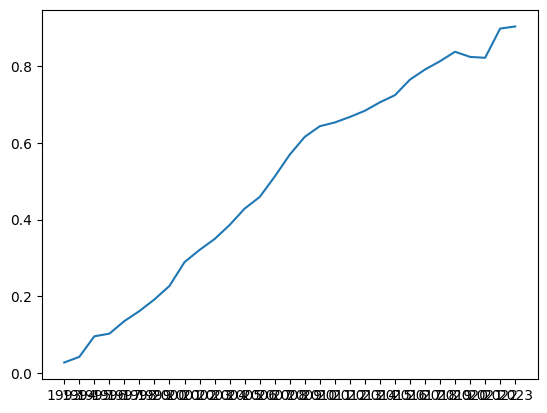

In [201]:
y = health * 0.3 + education * 0.3 + infrastruce * 0.2 + environmental * 0.1 + social_inclusion * 0.1
y.to_excel('y.xlsx')

plt.plot(y)

In [203]:
y.values

array([0.02722457, 0.04185731, 0.09554546, 0.10245362, 0.13531357,
       0.16145677, 0.19183425, 0.22705341, 0.28905601, 0.32100641,
       0.34936957, 0.38605446, 0.42880663, 0.45911382, 0.51235853,
       0.56964006, 0.61617328, 0.64384107, 0.65370207, 0.66805392,
       0.6842785 , 0.70627504, 0.72493365, 0.7655301 , 0.79186383,
       0.81358541, 0.83827551, 0.82481201, 0.8224678 , 0.89878897,
       0.9042269 ])

In [ ]:
x_data = pd.read_excel('data.xlsx')



0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
11929    South Sudan
11930    South Sudan
11931    South Sudan
11932    South Sudan
11933    South Sudan
Name: location, Length: 11934, dtype: object

In [214]:
x_data.index = x_data['id']
x_clean = x_data.drop(columns=['id', 'location', 'Series', 'Category'])
x = x_clean.transpose()
x.head()

id,70104000007,100104000010,110104000011,120104000012,150101000015,160101000016,170101000017,180104000018,270104000027,280104000028,...,5614001027627,5624001027628,5634001027629,5644001027630,5994001027665,6224002027688,6724004027738,6844001027750,6934003027759,6944001027760
1993,1.878951e+07,2.889968e+06,0.0,2.147732e+07,149.461,500.0,500.0,379340.0,22.930160,300.0,...,16.5,28.3,34.3,37.9,4181577.0,1.037,0.0,774425.0,41.25,3200.0
1994,1.889035e+07,2.514651e+06,0.0,2.290039e+07,156.835,500.0,500.0,378130.0,22.400003,300.0,...,16.1,27.7,33.3,37.2,4272523.0,1.037,0.0,798661.0,41.25,3300.0
1995,1.895606e+07,2.155011e+06,0.0,2.382507e+07,158.315,500.0,500.0,377630.0,21.869847,300.0,...,15.7,27.2,32.3,36.6,4396339.0,1.037,0.0,829497.0,41.25,3600.0
1996,1.878242e+07,2.452002e+06,0.0,2.183181e+07,157.603,520.0,500.0,377570.0,21.339690,300.0,...,15.3,26.5,31.2,35.8,4499978.0,1.037,0.0,856947.0,41.25,3700.0
1997,1.821171e+07,1.920184e+06,0.0,2.402106e+07,158.761,530.0,500.0,377950.0,20.809534,300.0,...,14.9,25.9,30.0,35.0,4620898.0,1.036,0.0,888238.0,43.75,3800.0


In [215]:
# Check if all columns in x are numeric
is_numeric = x.apply(lambda col: pd.to_numeric(col, errors='coerce').notna().all())
is_numeric

id
70104000007      True
100104000010     True
110104000011     True
120104000012     True
150101000015     True
                 ... 
6224002027688    True
6724004027738    True
6844001027750    True
6934003027759    True
6944001027760    True
Length: 11934, dtype: bool

In [221]:
x.isna().sum().sort_values(ascending=False)

id
6944001027760    0
70104000007      0
100104000010     0
110104000011     0
120104000012     0
                ..
540104000054     0
530104000053     0
520104000052     0
510104000051     0
500104000050     0
Length: 11934, dtype: int64

In [225]:
# 假设 x 和 y 是你的自变量和因变量
# 添加常数项到自变量
x = sm.add_constant(x)

# 计算 VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

# 打印 VIF 值
vif.to_csv('vif.csv')

# 删除 VIF 值高的变量（示例）
# 例如，删除 VIF 值大于 10 的变量
x = x.loc[:, vif["VIF Factor"] <= 10]

# 拟合模型
model = sm.OLS(y.values, x).fit()

# 获取 p 值
pvalues = model.pvalues
pvalues.to_csv('pvalues.csv')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


KeyboardInterrupt: 